In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('./Dataset 4.csv')

df['Sample Annotation'] = df['Sample Annotation'][1:]
df.set_index('Sample Annotation', inplace=True)

# index_to_remove = 0
# df.drop(0, inplace=True)
# df.drop('NaN', inplace=True)


# display(df)

df1 = df.drop(2)
display(df1)

KeyError: '[2] not found in axis'

In [ ]:
# display(df.describe())
# display(df.isnull().sum())

In [ ]:
# plt.figure(figsize=(15, 15))

# for column in df.columns:
#     plt.subplot(3, 3, df.columns.get_loc(column) + 1)  # Adjust the subplot layout as needed
#     sns.kdeplot(df[column], color='skyblue', fill=True)
#     plt.title(f' Raw Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [ ]:
df_transformed = df.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) else x)
# df_transformed.describe()

# plt.figure(figsize=(15, 15))

# for column in df_transformed.columns:
#     plt.subplot(3, 3, df_transformed.columns.get_loc(column) + 1)
#     sns.kdeplot(df_transformed[column], color='skyblue', fill=True)
#     plt.title(f'Log transformed Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# # plt.show()

In [ ]:
df_normalized = df_transformed.copy()

for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):
        median_value = df[column].median()
        df_normalized[column] = df[column] - median_value

# df_normalized.describe()


In [ ]:
# plt.figure(figsize=(15, 15))

# for column in df_normalized.columns:
#     plt.subplot(3, 3, df_normalized.columns.get_loc(column) + 1)
#     sns.kdeplot(df_normalized[column], color='skyblue', fill=True)
#     plt.title(f'Normalised Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# # plt.show()

In [ ]:
correlation_matrix = df_normalized.corr()

# # Create a heatmap
# plt.figure(figsize=(15, 15))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title("Correlation Heatmap")
# # plt.show()

In [ ]:
def median_mad_scaling(column_data):
    median_value = np.median(column_data)
    mad_value = np.median(np.abs(column_data - median_value))

    scaled_data = (column_data - median_value) / mad_value

    return scaled_data

df_scaled = df_normalized.apply(median_mad_scaling)

# display(df_scaled.describe())

In [ ]:
# plt.figure(figsize=(15, 15))

# for column in df_scaled.columns:
#     plt.subplot(3, 3, df_scaled.columns.get_loc(column) + 1)
#     sns.kdeplot(df_scaled[column], color='skyblue', fill=True)
#     plt.title(f'Norm and scaled Distro of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# # plt.show()

In [ ]:
# for column in df.columns:
#         x = df.loc[:, column].values
#         x = StandardScaler().fit_transform(x)


df = StandardScaler().fit_transform(df)
df = pd.DataFrame(df)
display(df)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.085184,-1.162984,-1.173691,-0.992982,-1.010822,-1.292052,-1.072325,-1.343647,-1.186119,-1.222845,...,-1.265225,-1.267331,-0.948455,-1.408343,-1.336821,-1.096306,-1.465375,-1.093669,-0.972612,-1.220214
1,1.414486,1.877019,0.811140,1.881270,-0.010888,1.138147,3.163439,1.940760,2.107584,2.251071,...,1.851996,1.073404,1.456908,0.983067,1.799834,2.460570,3.495625,1.852040,1.962665,1.428113
2,0.141641,-0.020256,-0.405958,-0.281558,-0.319928,-0.514017,-0.237381,-0.083595,-0.280402,-0.031835,...,-0.412725,0.154178,-0.143710,-0.037032,-0.124821,-0.133642,0.066448,0.044198,-0.195977,-0.072713
3,0.189437,-0.341086,0.396204,0.023163,0.287092,0.133508,0.098656,-0.078366,-0.010737,0.219225,...,-0.202929,-0.026622,0.013406,0.259735,-0.032143,0.077358,-0.227470,0.236948,0.060606,-0.007188
4,0.586693,-0.049549,0.213439,-0.118152,0.179168,0.560097,0.241727,0.189766,0.193096,0.263149,...,-0.005889,0.429505,0.365549,-0.117510,0.335053,0.375324,0.586460,0.492584,0.017415,0.371517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,-2.858309,-2.068155,-2.367751,-2.443645,-2.266017,-2.564394,-2.434383,-2.363281,-2.460424,-2.372452,...,-2.405106,-2.423403,-2.223872,-2.395072,-2.195886,-2.465333,-2.026670,-2.068384,-2.256650,-2.454065
3621,-2.348321,-1.888154,-2.342539,-2.310458,-2.264189,-2.358046,-2.587457,-2.467454,-2.254630,-2.125979,...,-2.227501,-2.352784,-2.214335,-2.309217,-2.220907,-2.359785,-2.016650,-2.214118,-2.377764,-2.385050
3622,-2.494874,-1.919475,-2.291114,-2.669538,-2.201238,-2.579601,-2.769517,-2.361163,-2.359515,-2.115383,...,-2.321629,-2.345307,-2.442258,-2.388648,-2.255712,-2.401256,-1.941157,-2.090996,-2.189163,-2.231058
3623,-2.207750,-2.197145,-2.186571,-2.466015,-2.374476,-2.471418,-2.409716,-2.277903,-2.266286,-2.056866,...,-2.483831,-2.685093,-2.091678,-2.212210,-2.260456,-2.375121,-1.992014,-2.439697,-2.302433,-2.318875


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
count,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3625.000000,...,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3.625000e+03,3625.000000,3.625000e+03
mean,-9.800589e-18,-1.176071e-17,-5.880354e-18,-7.840472e-18,-1.176071e-17,9.800589e-18,-1.176071e-17,-1.960118e-17,1.372083e-17,0.000000,...,-1.764106e-17,7.840472e-18,1.960118e-17,3.920236e-18,5.880354e-18,-3.920236e-18,-1.764106e-17,-1.372083e-17,0.000000,-3.920236e-18
std,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138,...,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138,1.000138e+00
min,-3.051855e+00,-2.711900e+00,-3.051594e+00,-3.019970e+00,-2.838127e+00,-2.902911e+00,-2.958028e+00,-2.896093e+00,-2.880868e+00,-2.842249,...,-2.901888e+00,-2.760758e+00,-3.063102e+00,-2.907653e+00,-3.003209e+00,-3.130416e+00,-2.569525e+00,-2.894512e+00,-2.813862,-2.765327e+00
25%,-5.016114e-01,-5.577115e-01,-5.062207e-01,-4.922334e-01,-5.160203e-01,-4.907124e-01,-5.279808e-01,-5.023204e-01,-5.300002e-01,-0.538159,...,-5.400992e-01,-5.250407e-01,-5.202039e-01,-5.068952e-01,-5.187147e-01,-5.041387e-01,-5.535531e-01,-5.451681e-01,-0.521292,-5.276321e-01
50%,-1.070336e-01,-1.363735e-01,-1.051716e-01,-1.157809e-01,-1.191008e-01,-8.734984e-02,-1.177553e-01,-1.173592e-01,-1.174614e-01,-0.135040,...,-1.318089e-01,-1.111806e-01,-1.184505e-01,-1.165240e-01,-1.381921e-01,-1.192280e-01,-1.429179e-01,-1.361221e-01,-0.118978,-1.334644e-01
75%,4.927421e-01,5.025393e-01,5.063677e-01,4.911613e-01,4.880666e-01,4.933329e-01,5.049249e-01,4.985820e-01,5.120960e-01,0.526808,...,4.949120e-01,5.087126e-01,4.860833e-01,4.919386e-01,5.066839e-01,4.961142e-01,4.899317e-01,5.063297e-01,0.493819,4.781524e-01
max,4.933734e+00,4.993123e+00,4.960547e+00,4.772774e+00,4.694904e+00,4.771775e+00,4.992188e+00,4.800890e+00,5.012474e+00,4.900415,...,4.740788e+00,4.903669e+00,4.837932e+00,5.196605e+00,5.015885e+00,5.115388e+00,5.125500e+00,4.905984e+00,5.107379,4.517859e+00


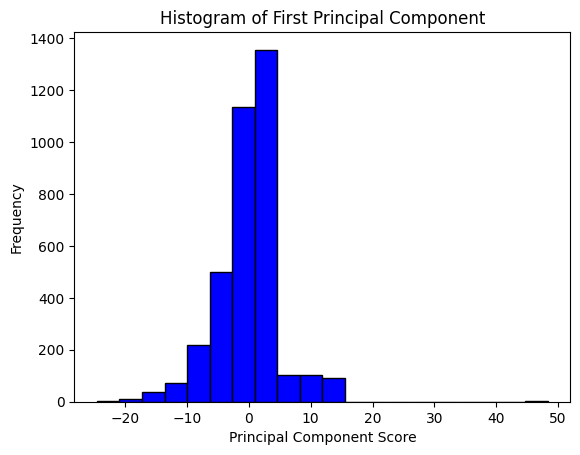

In [ ]:
#SKEE CURVE

pca_skee = PCA()
principal_components = pca_skee.fit_transform(df)

# Create a histogram for the first principal component
plt.hist(principal_components[:, 0], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of First Principal Component')
plt.xlabel('Principal Component Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,48.340209,-0.585421
1,5.893784,-0.003979
2,6.089527,-0.012169
3,-9.280550,-1.205831
4,0.505010,-0.009962
...,...,...
3622,12.058647,0.129819
3623,11.690873,0.119974
3624,11.766605,-0.029328
3625,11.847323,0.138328


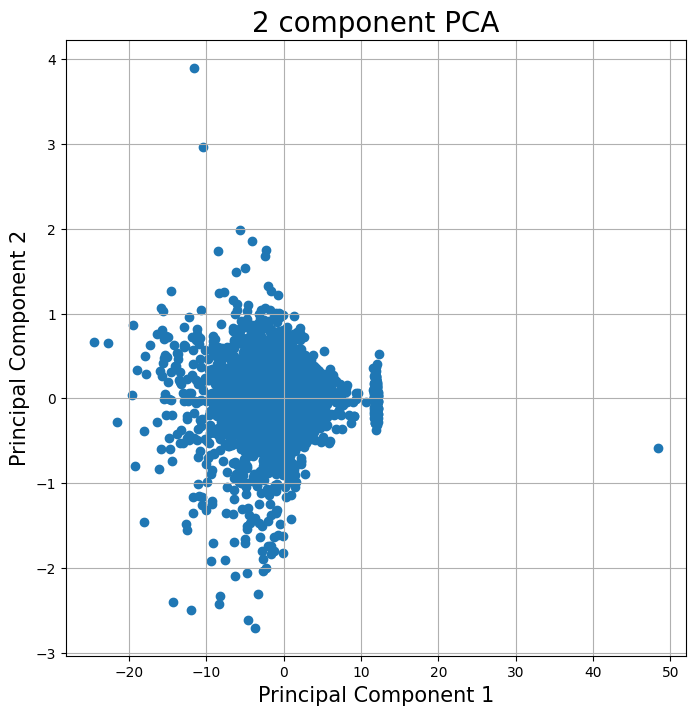

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2'])
ax.grid()

In [ ]:
for index, value in principalDf['principal component 1'].items():
  if value > 40 :
    print(index)
  # print(f"Row {index}, {'principal component 1'}: {value}")

0
